# 도표 시각화

In [431]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import font_manager, rc

In [432]:
# 한글 깨짐 방지 코드
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [444]:
# 월별 통합 데이터 = df
df = pd.read_csv('/localRepository/recipes_oraganization/chicken_price_prediction/데이터전처리/pre_data/월별_통합.csv',index_col=0)
df = df[['date','닭고기가격','병아리(원/수)','일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축']]
df.fillna(0, inplace=True) # null값을 0으로 채움
df.head()

,date,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,2012-01-31,3202,250,-1.5,0.0,4.0,8754,533.6,107.066111,356,58873
1,2012-02-29,3668,420,-1.1,0.0,3.0,10098,529.9,112.537302,672,55879
2,2012-03-31,4169,500,5.4,0.0,0.0,10836,527.9,117.745606,870,58750
3,2012-04-30,3399,332,12.4,0.0,0.0,13412,526.3,113.723667,718,60940
4,2012-05-31,3255,200,18.1,0.0,0.0,14519,526.2,104.184710,496,73505


In [445]:
# 일별 통합 데이터 = data
data = pd.read_csv('../데이터전처리/pre_data/일별_통합.csv',index_col=0)
data = data[['date','price','병아리(원/수)', 'oil_avg', '일별_평균기온', '일별_최저기온', '일별_최고기온']]
data.fillna(method='ffill',inplace=True) # 일별 데이터 data에서 유가 null 값을 null 뒤에 값으로 채움
data

,date,price,병아리(원/수),oil_avg,일별_평균기온,일별_최저기온,일별_최고기온
0,2021-12-31,4047,400.0,76.703333,-3.9,-7.2,0.1
1,2021-12-30,4047,400.0,77.850000,-0.7,-3.3,2.7
2,2021-12-29,3895,400.0,77.566667,2.5,-2.5,7.5
3,2021-12-28,3895,400.0,77.130000,0.0,-5.2,4.9
4,2021-12-27,3743,400.0,76.530000,-4.6,-11.2,0.5
...,...,...,...,...,...,...,...
2991,2012-01-06,3166,200.0,108.180000,-2.6,-7.8,3.7
2992,2012-01-05,3118,200.0,108.260000,-4.1,-8.7,1.5
2993,2012-01-04,3118,300.0,108.470000,-4.0,-6.6,-1.0
2994,2012-01-03,3118,300.0,107.000000,-1.9,-5.8,2.8


In [446]:
df.describe()

,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,3271.291667,362.950000,12.912500,1.108333,0.433333,9831.500000,463.733333,69.372053,605.058333,79423.816667
std,436.565499,190.619858,9.247108,3.034247,1.150326,2329.985754,41.979083,24.392684,147.560687,13590.881080
min,2457.000000,100.000000,-2.500000,0.000000,0.000000,4102.000000,414.000000,21.241587,272.000000,47742.000000
25%,2938.000000,203.000000,4.900000,0.000000,0.000000,8355.500000,427.225000,50.116787,494.500000,70178.250000
50%,3222.000000,328.500000,13.600000,0.000000,0.000000,9775.000000,441.450000,62.704316,618.500000,80270.500000
75%,3592.250000,500.000000,21.425000,0.000000,0.000000,11464.250000,502.025000,97.194735,714.000000,87413.250000
max,4456.000000,860.000000,27.100000,16.000000,6.000000,16777.000000,548.800000,117.745606,898.000000,118942.000000


In [447]:
data.describe()

,price,병아리(원/수),oil_avg,일별_평균기온,일별_최저기온,일별_최고기온
count,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000
mean,3273.932243,360.914553,69.388440,13.167089,8.433344,18.614619
std,501.571001,202.944184,24.398942,9.626387,10.076406,9.592830
min,2067.000000,100.000000,2.906667,-12.300000,-16.800000,-7.300000
25%,2927.000000,200.000000,50.262500,4.800000,-0.300000,10.400000
50%,3279.000000,300.000000,62.970000,13.600000,8.300000,19.900000
75%,3590.000000,500.000000,97.755000,21.700000,17.700000,26.900000
max,4657.000000,900.000000,119.246667,30.300000,25.900000,36.600000


#### 닭고기가격 분포 확인

<AxesSubplot:xlabel='닭고기가격'>

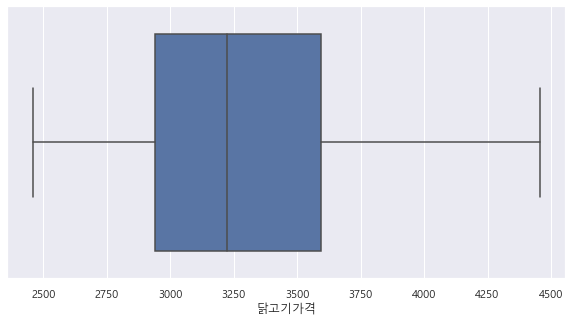

In [448]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.grid'] = True
sns.boxplot(df['닭고기가격'])

# 타겟변수인 닭고기 가격의 분산이 작은 것이 확인 가능함

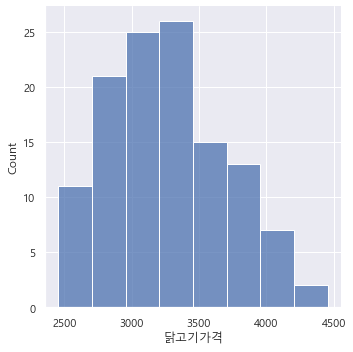

In [449]:
sns.displot(df['닭고기가격'])

<AxesSubplot:xlabel='닭고기가격', ylabel='Density'>

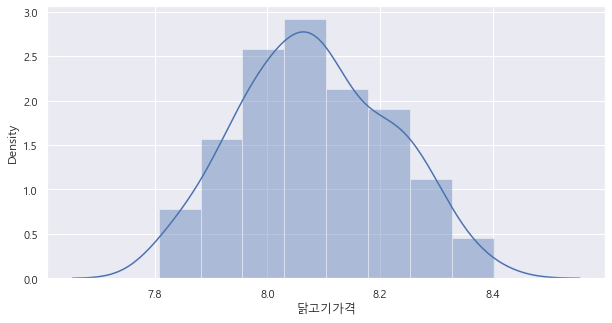

In [450]:
# 위의 그래프를 비교해보면 닭고기가격에 log를 취해주면 기존보다 더 정규분포에 가까워 진 것을 확인 할 수 있음.

f, ax = plt.subplots()

sns.distplot(np.log1p(df['닭고기가격']))


#### 변수 분포 확인

IndexError: list index out of range

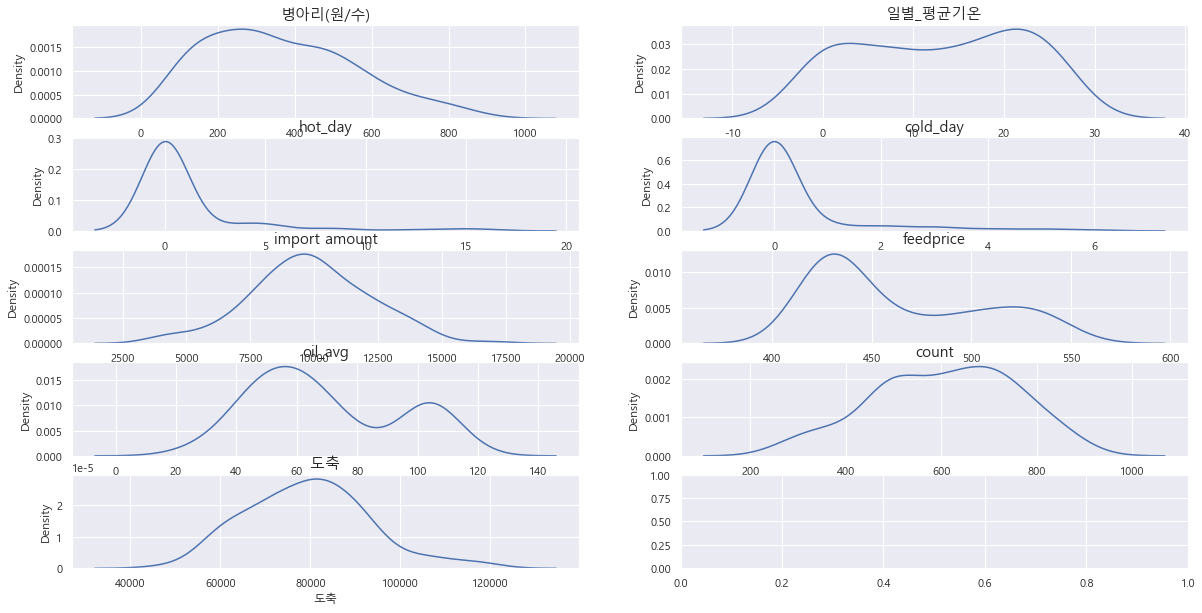

In [451]:
# 월별 원본 데이터로 분포 확인

fig, ax = plt.subplots(5, 2, figsize=(20,10))
count = 0
columns = ['병아리(원/수)','일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축']

for row in range(5):
    for col in range(2):
        sns.kdeplot(df[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1

IndexError: list index out of range

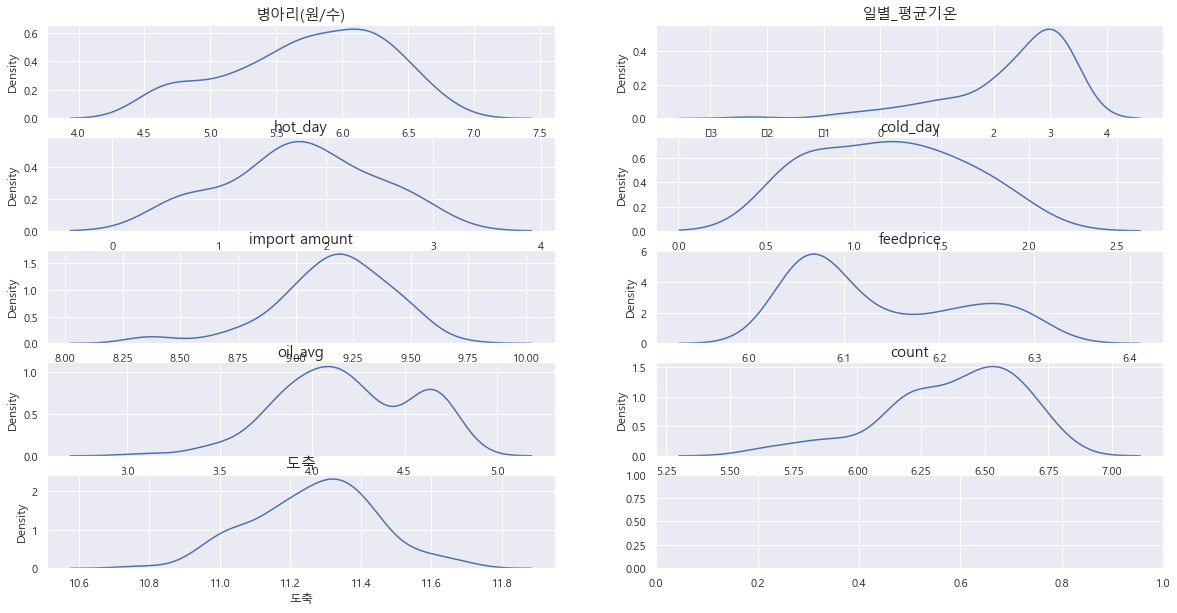

In [ ]:
# 월별 데이터 정규화해서 분포 확인

data_log = df.copy()
skew_columns = ['병아리(원/수)','일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축']

for c in skew_columns:
    data_log[c] = np.log1p(data_log[c].values)

fig, ax = plt.subplots(5, 2, figsize=(20, 10))

count = 0
for row in range(5):
    for col in range(2):
        sns.kdeplot(data_log[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1
        
plt.tight_layout()

In [454]:
# 월별 통합 데이터 정규화

data_log['닭고기가격'] = np.log1p(df['닭고기가격'])
data_log

,date,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,date_year,date_month
0,2012-01-31,8.071843,5.525453,NaN,NaN,1.609438,9.077380,6.281519,4.682743,5.877736,10.983155,2012,01
1,2012-02-29,8.207674,6.042633,NaN,NaN,1.386294,9.220192,6.274574,4.732131,6.511745,10.930962,2012,02
2,2012-03-31,8.335671,6.216606,1.856298,NaN,NaN,9.290721,6.270799,4.776983,6.769642,10.981063,2012,03
3,2012-04-30,8.131531,5.808142,2.595255,NaN,NaN,9.503980,6.267770,4.742526,6.577861,11.017661,2012,04
4,2012-05-31,8.088255,5.303305,2.949688,NaN,NaN,9.583282,6.267580,4.655718,6.208590,11.205122,2012,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,8.162231,5.746203,3.250374,1.386294,NaN,9.144307,6.200509,4.252031,6.508769,11.406375,2021,08
116,2021-09-30,8.031060,6.013715,3.104587,NaN,NaN,9.106090,6.222576,4.303729,6.173786,11.302538,2021,09
117,2021-10-31,8.272315,6.104793,2.778819,NaN,NaN,9.393162,6.232448,4.421167,6.383507,11.305028,2021,10
118,2021-11-30,8.001690,5.755742,2.230014,NaN,NaN,9.212937,6.255750,4.392703,6.481577,11.371592,2021,11


In [455]:
data_raw=df.copy()
data_raw

,date,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,2012-01-31,3202,250,-1.5,0.0,4.0,8754,533.6,107.066111,356,58873
1,2012-02-29,3668,420,-1.1,0.0,3.0,10098,529.9,112.537302,672,55879
2,2012-03-31,4169,500,5.4,0.0,0.0,10836,527.9,117.745606,870,58750
3,2012-04-30,3399,332,12.4,0.0,0.0,13412,526.3,113.723667,718,60940
4,2012-05-31,3255,200,18.1,0.0,0.0,14519,526.2,104.184710,496,73505
...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,24.8,3.0,0.0,9360,492.0,69.247955,670,89892
116,2021-09-30,3074,408,21.3,0.0,0.0,9009,503.0,72.975152,479,81026
117,2021-10-31,3913,447,15.1,0.0,0.0,12005,508.0,82.193333,591,81228
118,2021-11-30,2985,315,8.3,0.0,0.0,10025,520.0,79.858712,652,86819


### 닭고기가격 - 병아리 가격 분포 확인

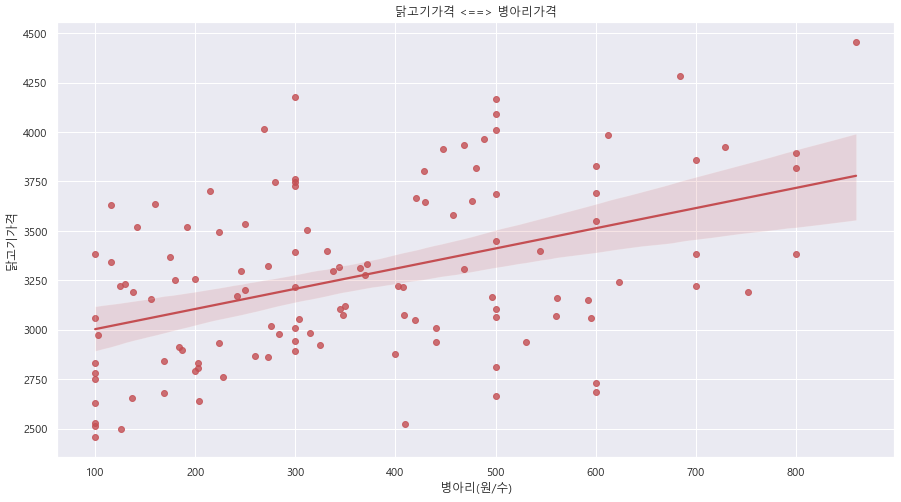

In [456]:
# 원본 데이터 분포 확인
raw_data = pd.concat([df['닭고기가격'], df['병아리(원/수)']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 병아리가격")
fig = sns.regplot(x='병아리(원/수)', y="닭고기가격", data=raw_data, color="r")

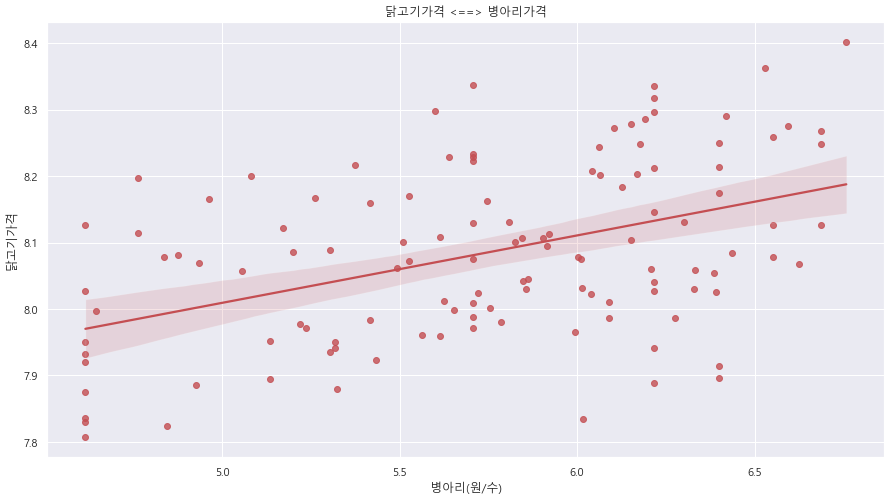

In [457]:
# 정규화한 데이터 분포 확인
raw_data = pd.concat([data_log['닭고기가격'], data_log['병아리(원/수)']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 병아리가격")
fig = sns.regplot(x='병아리(원/수)', y="닭고기가격", data=raw_data, color="r")

### 닭고기가격 - 월별 평균기온 분포 확인

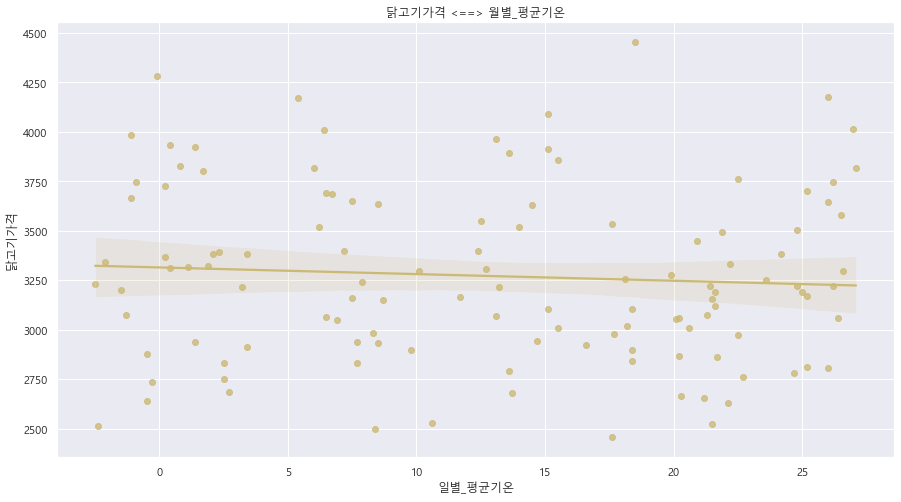

In [458]:
# 원본 데이터 분포 확인
raw_data = pd.concat([df['닭고기가격'], df['일별_평균기온']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 월별_평균기온")
fig = sns.regplot(x='일별_평균기온', y="닭고기가격", data=raw_data, color="y")

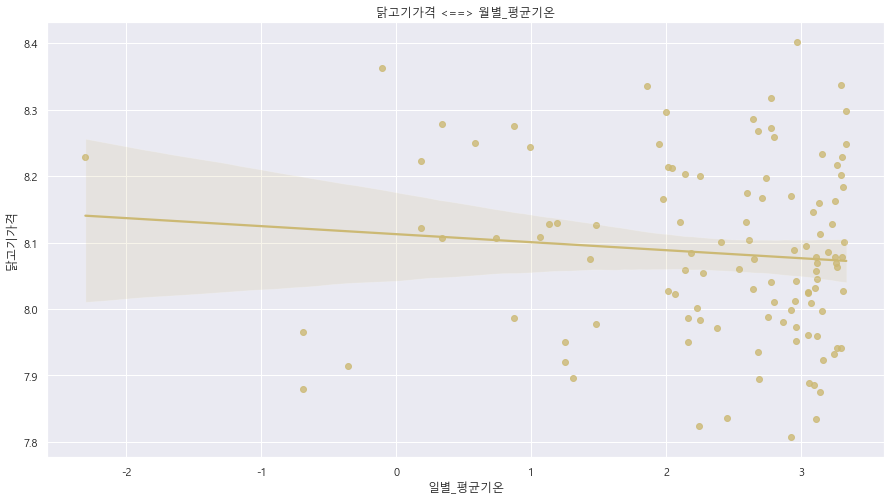

In [459]:
# 정규화 데이터 분포 확인
raw_data = pd.concat([data_log['닭고기가격'], data_log['일별_평균기온']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 월별_평균기온")
fig = sns.regplot(x='일별_평균기온', y="닭고기가격", data=raw_data, color="y")

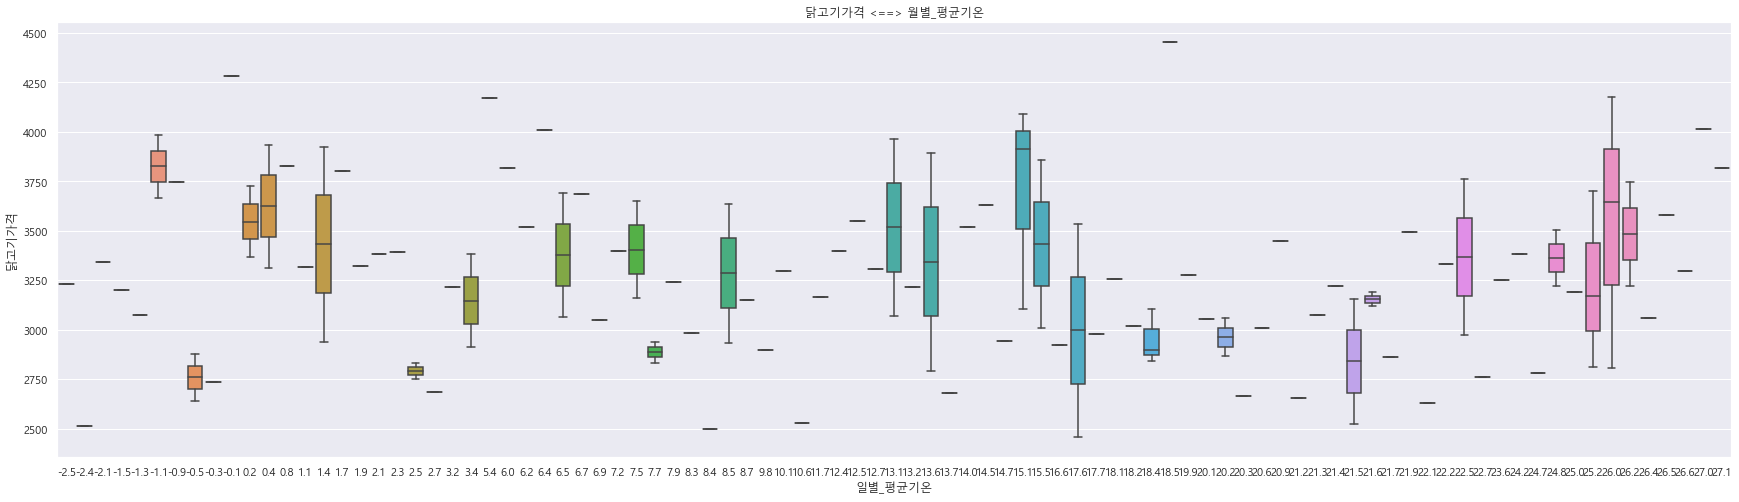

In [460]:
# boxplot으로 원본 닭고기가격 - 월별 평균 기온 데이터 시각화

raw_data = pd.concat([df['닭고기가격'], df['일별_평균기온']], axis=1)
f, ax = plt.subplots(figsize=(30, 8))
plt.title("닭고기가격 <==> 월별_평균기온")
fig = sns.boxplot(x='일별_평균기온', y="닭고기가격", data=raw_data)

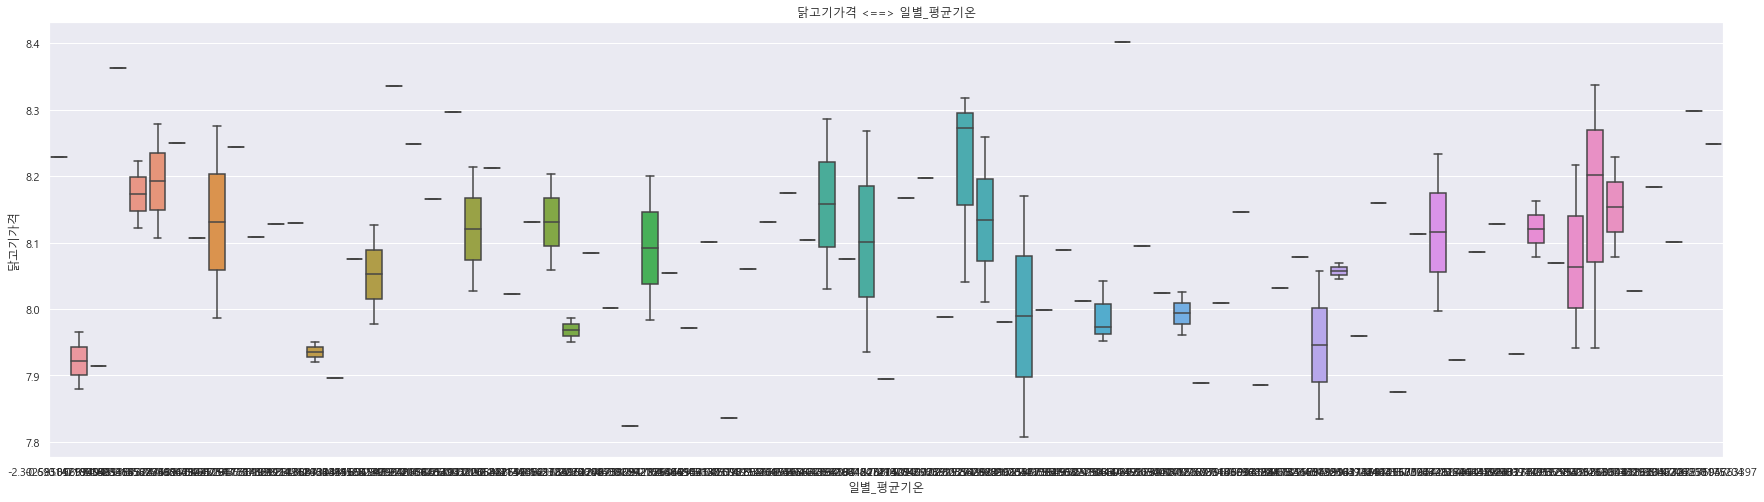

In [461]:
# 정규화한 닭고기가격 - 월별 평균기온 데이터 분포 확인

raw_data = pd.concat([data_log['닭고기가격'], data_log['일별_평균기온']], axis=1)
f, ax = plt.subplots(figsize=(30, 8))
plt.title("닭고기가격 <==> 일별_평균기온")
fig = sns.boxplot(x='일별_평균기온', y="닭고기가격", data=raw_data)

### 닭고기 가격 - 수입량 분포 확인

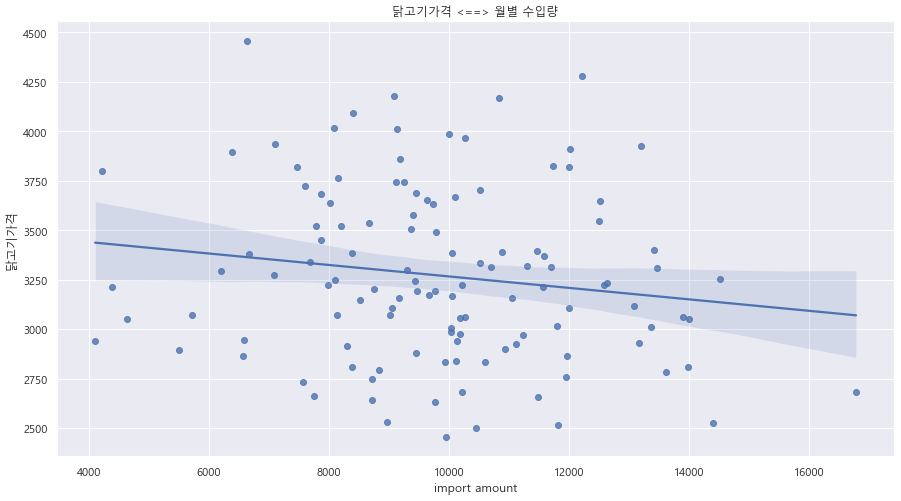

In [462]:
# 원본 데이터 분포 확인

raw_data = pd.concat([df['닭고기가격'], df['import amount']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 월별 수입량")
fig = sns.regplot(x='import amount', y="닭고기가격", data=raw_data, color="b")

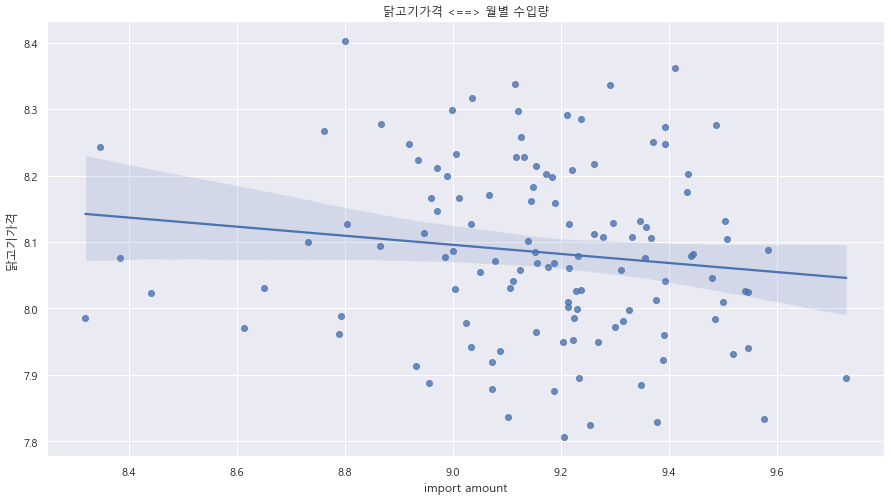

In [463]:
# 정규화한 데이터 분포 확인

raw_data = pd.concat([data_log['닭고기가격'], data_log['import amount']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 월별 수입량")
fig = sns.regplot(x='import amount', y="닭고기가격", data=raw_data, color="b")

### 닭고기가격 - 폭염/한파 데이터 분포 확인

Text(0, 0.5, '닭고기가격')

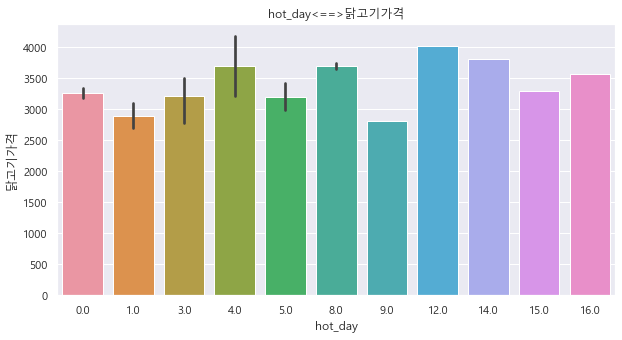

In [464]:
ax = plt.subplots() 
ax = sns.barplot(x='hot_day', y='닭고기가격', data=df) 
ax.set_title('hot_day<==>닭고기가격') 
ax.set_xlabel('hot_day') 
ax.set_ylabel('닭고기가격')

In [465]:
df.groupby("hot_day").mean()

,닭고기가격,병아리(원/수),일별_평균기온,cold_day,import amount,feedprice,oil_avg,count,도축
hot_day,,,,,,,,,
0.0,3263.448980,380.602041,10.222449,0.530612,9669.051020,463.490816,69.402708,601.244898,75920.918367
1.0,2899.250000,339.000000,21.150000,0.000000,10740.500000,451.050000,66.044857,645.500000,89754.750000
3.0,3224.000000,170.666667,24.566667,0.000000,11006.333333,463.933333,61.805357,734.666667,108118.000000
4.0,3700.000000,212.500000,25.400000,0.000000,10836.500000,522.650000,105.378043,499.000000,98965.000000
5.0,3193.166667,266.333333,25.533333,0.000000,10033.166667,454.116667,54.883136,545.000000,95792.500000
8.0,3695.500000,354.500000,26.100000,0.000000,10809.500000,500.750000,89.184397,529.000000,88882.500000
9.0,2808.000000,203.000000,26.000000,0.000000,13977.000000,430.000000,57.768485,718.000000,97472.000000
12.0,4015.000000,269.000000,27.000000,0.000000,8084.000000,538.400000,107.920606,775.000000,75362.000000
14.0,3819.000000,480.000000,27.100000,0.000000,11990.000000,431.600000,71.377391,754.000000,86408.000000


Text(0, 0.5, '닭고기가격')

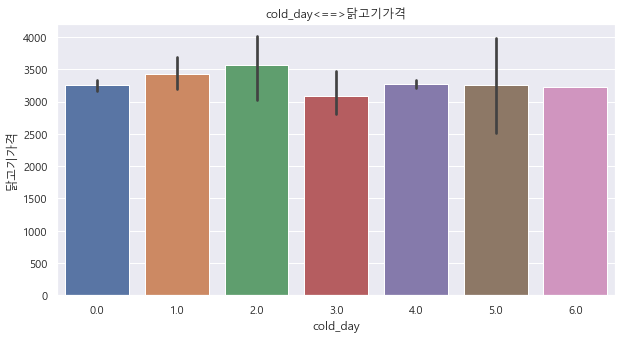

In [466]:
ax = plt.subplots() 
ax = sns.barplot(x='cold_day', y='닭고기가격', data=df) 
ax.set_title('cold_day<==>닭고기가격') 
ax.set_xlabel('cold_day') 
ax.set_ylabel('닭고기가격')

In [467]:
df.groupby("cold_day").mean()

,닭고기가격,병아리(원/수),일별_평균기온,hot_day,import amount,feedprice,oil_avg,count,도축
cold_day,,,,,,,,,
0.0,3255.240000,364.25,15.574,1.33,9901.120000,462.828000,68.813441,634.90,81168.540000
1.0,3424.666667,365.00,0.900,0.00,8745.666667,481.233333,68.973336,471.00,72622.333333
2.0,3572.200000,392.60,-0.100,0.00,10699.400000,454.420000,67.116465,460.20,74905.200000
3.0,3087.500000,442.00,-0.800,0.00,8206.500000,451.950000,65.030050,470.25,66244.750000
4.0,3271.000000,183.00,-1.800,0.00,8219.000000,518.150000,104.157097,314.00,60565.500000
5.0,3249.000000,356.00,-1.750,0.00,10906.000000,418.600000,60.204136,583.00,78608.500000
6.0,3232.000000,130.00,-2.500,0.00,12621.000000,524.400000,105.037273,315.00,60417.000000


### 닭고기가격 - 사료값 데이터 분포 확인

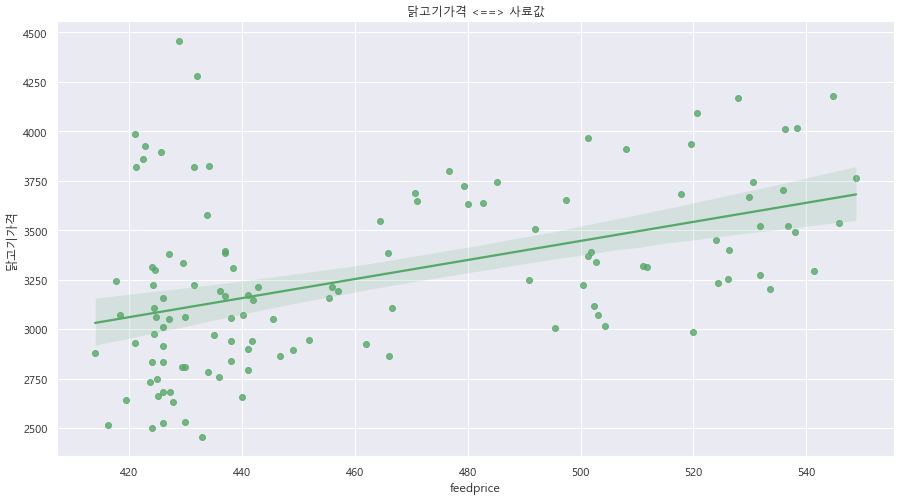

In [468]:
# 데이터 분포 확인
raw_data = pd.concat([df['닭고기가격'], df['feedprice']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 사료값")
fig = sns.regplot(x='feedprice', y="닭고기가격", data=raw_data, color="g")

### 닭고기가격 - 유가 데이터 분포 확인

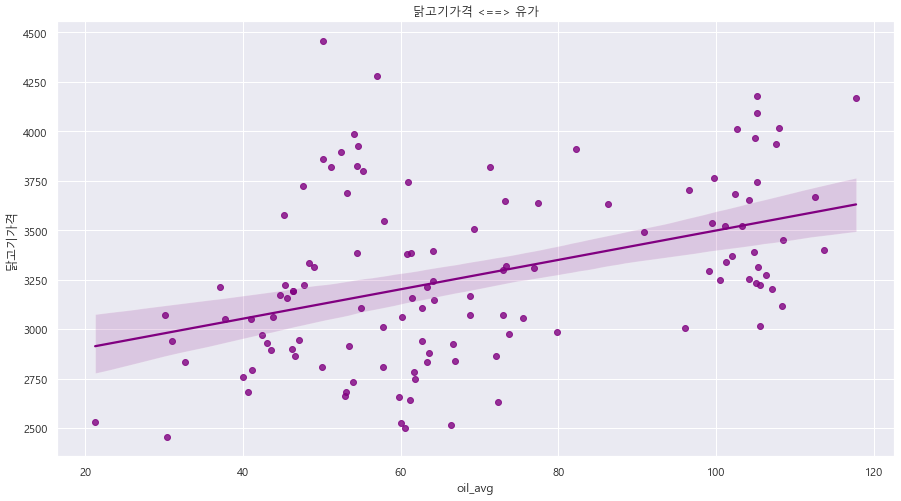

In [469]:
# 데이터 분포 확인
raw_data = pd.concat([df['닭고기가격'], df['oil_avg']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 유가")
fig = sns.regplot(x='oil_avg', y="닭고기가격", data=raw_data, color="purple")

### Linear Rgression

In [470]:
# Linear Regression

from sklearn.linear_model import LinearRegression

X = df['병아리(원/수)']
y = df['닭고기가격']

line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1),y)


LinearRegression()

In [471]:
y_predicted = line_fitter.predict([[450]])
y_predicted

array([3360.112191])

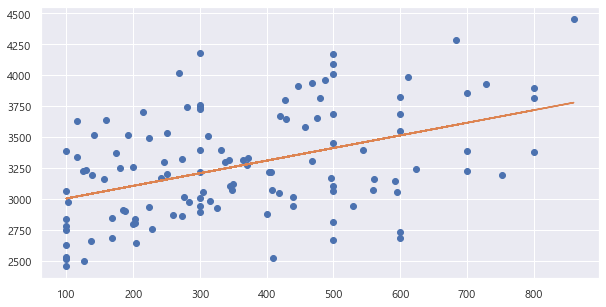

In [472]:
plt.plot(X,y,'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

Epoch 1/20
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00     
Epoch 2/20
120/120 [==============================] - 0s 965us/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/20
120/120 [==============================] - 0s 804us/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/20
120/120 [==============================] - 0s 766us/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/20
120/120 [==============================] - 0s 998us/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/20
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/20
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/20
120/120 [==============================] - 0s 738us/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/20
120/120 [==============================] - 0s 674us/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/20
120/120 [==============================] - 0s 690us/step - los

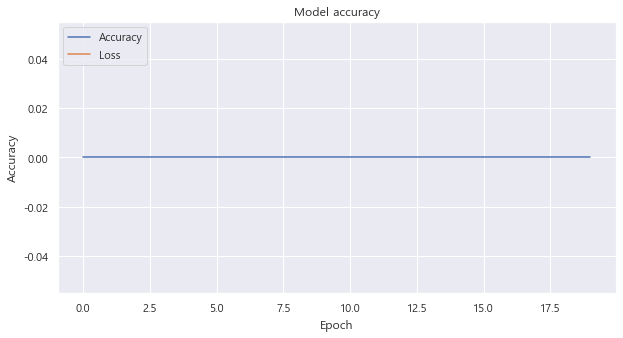

In [473]:
# 튜닝하는 것인데, 형식이 안맞아서인지 뭔지 때문에 학습이 안됨
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

# data set
x_data = df[['병아리(원/수)']]
y_data = df[['닭고기가격']]

# model: linear regression input dense with dim =1
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='linear'))

# model compile:  SGD learning_rate of 0.01 
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(loss='mse',optimizer=sgd, metrics=['accuracy'])

# model fit
history = model.fit(x_data.values.reshape(-1,1), y_data, epochs=20, batch_size=1, shuffle=False, verbose=1)

# prediction
print (model.predict([500]))

# print model summary
model.summary()

# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
#print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
# plt.savefig('tran_result.png')
#plt.show()


### 다중선형회귀분석(월별)

In [474]:
from sklearn.model_selection import train_test_split

x = df[['병아리(원/수)','일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축']]
y = df[['닭고기가격']]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, test_size=0.2)


In [475]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [476]:
pred = [[450,20,0,0,10000,500,110,500,73505]]
my_predict = mlr.predict(pred)
my_predict

array([[3410.800720]])

In [477]:
y_predict = mlr.predict(x_test)
y_predict

array([[2807.152718],
       [3729.825593],
       [3229.600983],
       [2890.308798],
       [3102.047616],
       [2864.776270],
       [3230.392015],
       [3750.841497],
       [3087.056557],
       [2941.834672],
       [2654.034756],
       [3628.842967],
       [3250.111473],
       [3443.022844],
       [2838.757682],
       [3228.594172],
       [2917.896216],
       [3475.766498],
       [3549.926571],
       [3110.194468],
       [3100.258872],
       [3647.141556],
       [3079.423352],
       [3154.591109]])

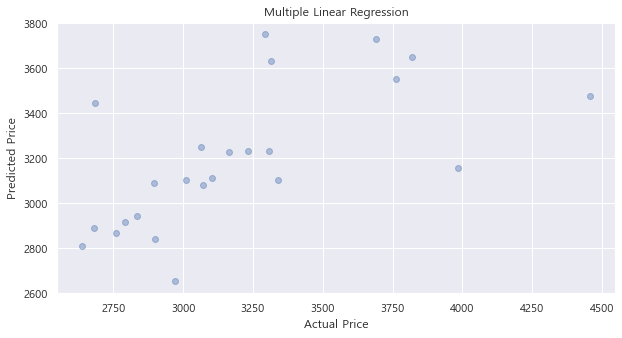

In [478]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression")
plt.show()

In [479]:
mlr.coef_

array([[1.171688, -16.311954, 49.931257, -65.402595, 0.015577, 7.616451,
        -2.172112, 0.094541, 0.000002]])

In [480]:
mlr.score(x_train, y_train)
# 0.7이 넘어야 양호한 점수임(닭고기 가격의 57%를 저 항목들로 설명할 수 있다는 의미)
# https://hleecaster.com/ml-multiple-linear-regression-example/

0.6170453650140499

### 다중회귀분석(일별)

In [481]:
data.head()

,date,price,병아리(원/수),oil_avg,일별_평균기온,일별_최저기온,일별_최고기온
0,2021-12-31,4047,400.0,76.703333,-3.9,-7.2,0.1
1,2021-12-30,4047,400.0,77.850000,-0.7,-3.3,2.7
2,2021-12-29,3895,400.0,77.566667,2.5,-2.5,7.5
3,2021-12-28,3895,400.0,77.130000,0.0,-5.2,4.9
4,2021-12-27,3743,400.0,76.530000,-4.6,-11.2,0.5


[[3290.012882]]


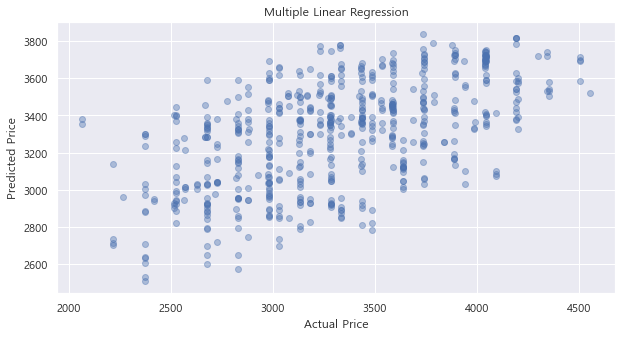

0.31000986883962756

In [482]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = data[['병아리(원/수)','oil_avg','일별_평균기온', '일별_최저기온', '일별_최고기온']]
y = data[['price']]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, test_size=0.2)

mlr = LinearRegression()
mlr.fit(x_train, y_train)

pred = [[400,78,20,10,25]]
my_predict = mlr.predict(pred)
print(my_predict)

y_predict = mlr.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression")
plt.show()

mlr.score(x_train, y_train)
# 31.2%로 월별 데이터보다 더 안좋은 결과가 나옴

### Ridge

In [483]:
df.head()

,date,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,2012-01-31,3202,250,-1.5,0.0,4.0,8754,533.6,107.066111,356,58873
1,2012-02-29,3668,420,-1.1,0.0,3.0,10098,529.9,112.537302,672,55879
2,2012-03-31,4169,500,5.4,0.0,0.0,10836,527.9,117.745606,870,58750
3,2012-04-30,3399,332,12.4,0.0,0.0,13412,526.3,113.723667,718,60940
4,2012-05-31,3255,200,18.1,0.0,0.0,14519,526.2,104.184710,496,73505


In [490]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df = df.drop(columns='date')
data_input = df.copy()
data_output = data_input.pop('닭고기가격')

train_input, test_input, train_target, test_target = train_test_split(data_input,data_output, test_size=0.2)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(96, 9) (96,)
(24, 9) (24,)


In [491]:
alpha_value = [0.01, 0.1, 1, 10, 100]

for alpha in alpha_value:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_input, train_target)

    scores = cross_val_score(ridge, train_input, train_target, cv=5)

    print(f"alpha : {alpha}")
    print(f"ridge train score : {ridge.score(train_input, train_target)}")
    print(f"ridge test score : {ridge.score(test_input, test_target)}")
    print('\n')

alpha : 0.01
ridge train score : 0.6010839811848586
ridge test score : 0.5401384230811479


alpha : 0.1
ridge train score : 0.6010839727548101
ridge test score : 0.5401679493996063


alpha : 1
ridge train score : 0.6010831467950927
ridge test score : 0.5404583581081982


alpha : 10
ridge train score : 0.6010147156634429
ridge test score : 0.5429394254824771


alpha : 100
ridge train score : 0.5986083035037408
ridge test score : 0.5507122153725308




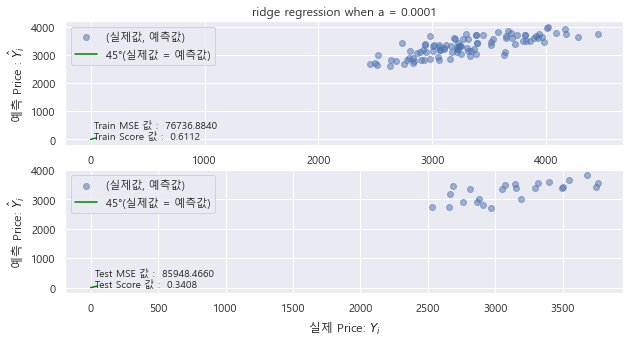

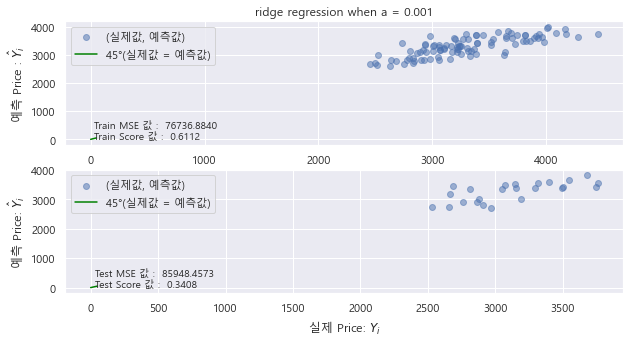

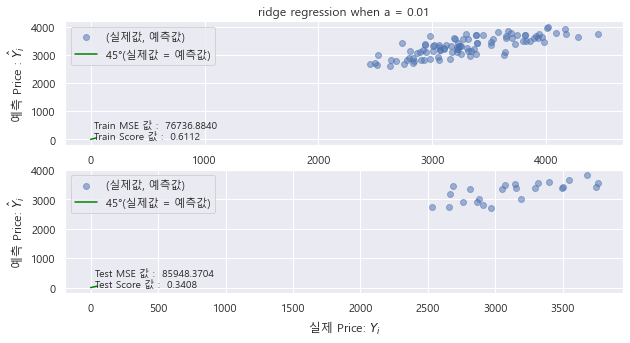

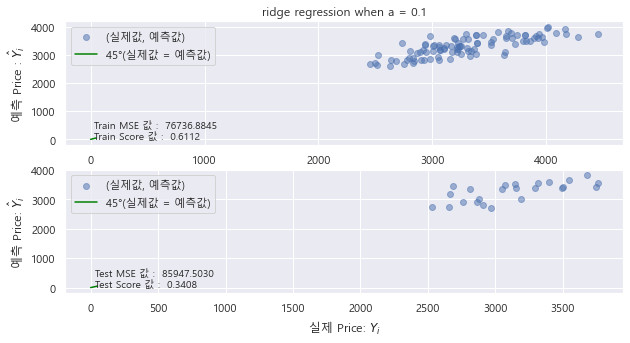

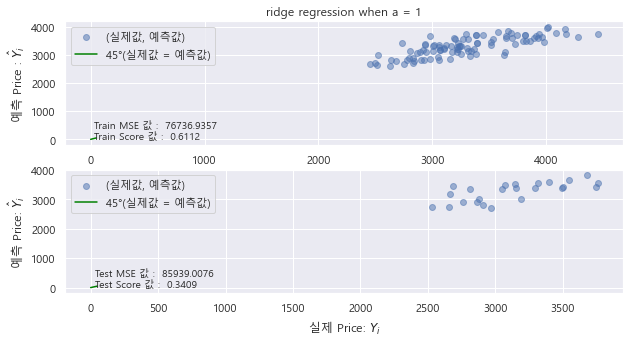

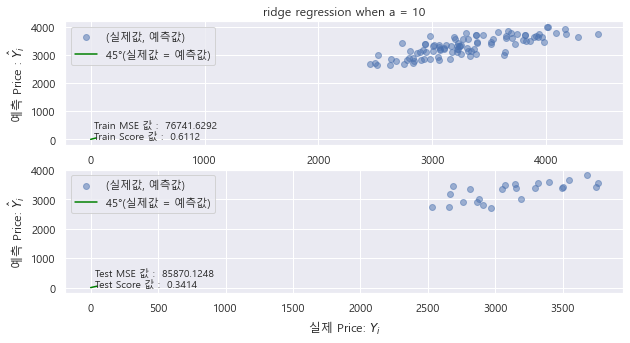

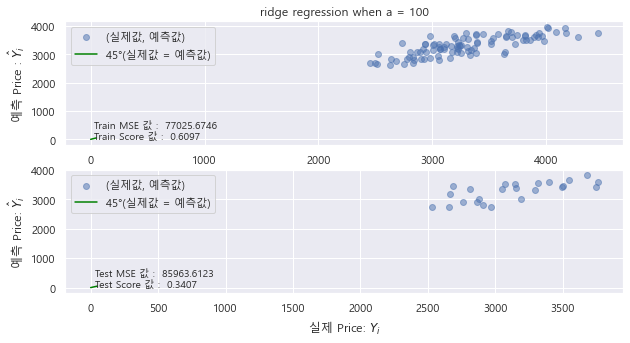

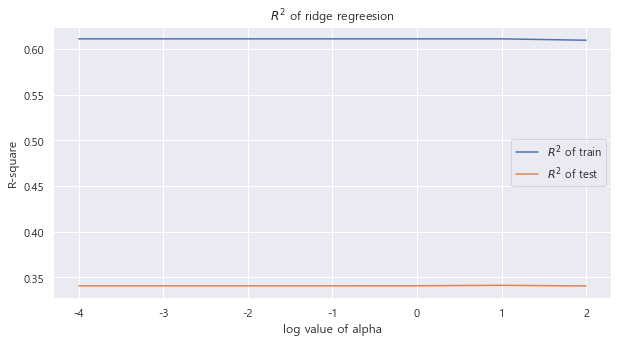

,alpha = 0.0001,alpha = 0.001,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
병아리(원/수),1.4807,1.4807,1.4807,1.4807,1.4808,1.4820,1.4884
일별_평균기온,-10.5813,-10.5813,-10.5811,-10.5786,-10.5542,-10.3255,-8.7904
hot_day,43.7751,43.7751,43.7743,43.7662,43.6856,42.9062,36.7299
cold_day,-5.9659,-5.9657,-5.9645,-5.9525,-5.8337,-4.7872,-0.4780
import amount,0.0028,0.0028,0.0028,0.0028,0.0028,0.0027,0.0020
feedprice,7.3767,7.3767,7.3767,7.3767,7.3769,7.3781,7.3694
oil_avg,-1.8947,-1.8947,-1.8947,-1.8948,-1.8950,-1.8963,-1.8648
count,0.2073,0.2073,0.2073,0.2073,0.2073,0.2068,0.1952
도축,0.0023,0.0023,0.0023,0.0023,0.0023,0.0024,0.0025
R^2 of Train,0.6112,0.6112,0.6112,0.6112,0.6112,0.6112,0.6097


In [492]:
# 함수화 작업
def ridge_regression(data, target_col, plot=True):
    # 라이브러리 호출 
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import train_test_split

    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

    # feature, target 분리
    feature = df.drop(columns='닭고기가격')
    target = df['닭고기가격']

    # 훈련, 검정셋 분리
    X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.2, random_state = 2022)

    # 빈 리스트 셍성
    train_score = []
    test_score = []
    r_squared = []
    intercept = []
    mse_train = []
    mse_test = []
    # 하이퍼파라미터 적용
    alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    # 라소 회귀 요약 데이터 형성
    ridge_data = pd.DataFrame()

    for alpha in alpha_list:
        # 라소 회귀 시행
        ridge = Ridge(alpha= alpha, max_iter = 10000).fit(X_train, Y_train)
        # 결정계수 및 절편 리스트
        train_score.append(np.round(ridge.score(X_train, Y_train), 4))
        test_score.append(np.round(ridge.score(X_test, Y_test), 4))
        intercept.append(np.round(ridge.intercept_, 4))
        # 라소 회귀에서 도출된 각 feature의 계수
        ridge_data = pd.concat([ridge_data, pd.DataFrame(np.round(ridge.coef_, 4), ridge.feature_names_in_)], axis=1)
        # 훈련, 검정셋에서 y 값 예측 (기댓값 도출)
        Y_pred_train = ridge.predict(X_train)
        Y_pred = ridge.predict(X_test)
        # 훈련, 검정셋에서 MSE 도출 
        mse_train.append(np.round(mean_squared_error(Y_train,Y_pred_train),4))
        mse_test.append(np.round(mean_squared_error(Y_test,Y_pred),4))
        
        # 도식화 여부
        if plot == True:
            plt.subplot(2,1,1)
            plt.scatter(Y_train,Y_pred_train, label = '(실제값, 예측값)', alpha=.5)
            plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
            plt.xlabel("실제 Price: $Y_i$")
            plt.ylabel("예측 Price : $\hat{Y}_i$")
            plt.title(f'ridge regression when a = {alpha}')
            plt.legend()
            plt.text(y=5,x=30, s=f'Train MSE 값 : {mean_squared_error(Y_train,Y_pred_train) : .4f}\nTrain Score 값 : {ridge.score(X_train,Y_train) : .4f}')
            plt.subplot(2,1,2)
            plt.scatter(Y_test,Y_pred, label = '(실제값, 예측값)', alpha=.5)
            plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
            plt.xlabel("실제 Price: $Y_i$")
            plt.ylabel("예측 Price: $\hat{Y}_i$")
            plt.legend(loc='upper left')
            plt.text(y=5,x=30, s=f'Test MSE 값 : {mean_squared_error(Y_test,Y_pred) : .4f}\nTest Score 값 : {ridge.score(X_test,Y_test) : .4f}')
            plt.show()
        else:
            pass
    
    # 결정계수 출력
    plt.plot(np.log10(alpha_list), train_score, label ='$R^2$ of train')
    plt.plot(np.log10(alpha_list), test_score, label ='$R^2$ of test')
    plt.title('$R^2$ of ridge regreesion')
    plt.xlabel('log value of alpha')
    plt.ylabel('R-square')
    plt.legend()
    plt.show()
    
    # 라소 회귀 요약 데이터 형성
    ridge_data.columns = [f'alpha = {i}' for i in alpha_list]
    score = pd.DataFrame({'R^2 of Train' : train_score,
                        'R^2 of Test' : test_score,
                        'intercept' : intercept,
                        'mse_train' : mse_train,
                        'mse_test' : mse_test}).transpose()
    score.columns= [f'alpha = {i}' for i in alpha_list]
    ridge_summary = pd.concat([ridge_data, score], axis=0)

    return ridge_summary

# 데이터는 pd.DataFrame, concat을 사용하여 따로 data를 만들어 주었음
subx = pd.DataFrame(X, columns=df.columns)
suby = pd.DataFrame(y, columns=df['닭고기가격'])

data = pd.concat([subx,suby], axis=1)

# 위의 함수 시행
ridge_regression(data,'target')

### Lasso

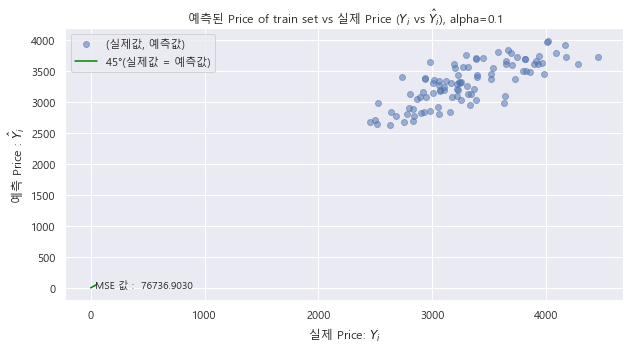

In [493]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# feature, target 분리
feature = df.drop(columns='닭고기가격')
target = df['닭고기가격']

# train, test 분리
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.2, random_state = 2022)

# 하이퍼파라미터 설정
alpha_value = 0.1
lasso = Lasso(alpha=alpha_value).fit(X_train,Y_train) 
Y_pred_train = lasso.predict(X_train) 
Y_pred = lasso.predict(X_test)

# 시각화
plt.scatter(Y_train,Y_pred_train, label = '(실제값, 예측값)', alpha=.5)
plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
plt.xlabel("실제 Price: $Y_i$")
plt.ylabel("예측 Price : $\hat{Y}_i$")
plt.legend()
plt.title("예측된 Price of train set vs 실제 Price ($Y_i$ vs $\hat{Y}_i$), " + f"alpha={alpha_value}")
plt.text(y=0,x=35, s=f'MSE 값 : {mean_squared_error(Y_train,Y_pred_train) : .4f}')
plt.show()

In [494]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
alphas = np.linspace(0, 1, 100)
parameters = {'alpha': alphas }
lasso_reg = GridSearchCV(lasso, parameters, scoring='r2',cv=5)
lasso_reg.fit(feature,target)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 1.0}
0.2841935495360956


### Random Forests

In [495]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(feature,target)

RandomForestRegressor()

In [496]:
RF_model.score(feature,target)
# 92%의 점수로 지금까지는 가장 유의해보임

0.9237246513749627

### Decision Tree

In [497]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(feature,target,test_size=0.2, random_state=1)

dt_regr = DecisionTreeRegressor(max_depth=5)

dt_regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [498]:
from sklearn.metrics import r2_score


y_pred = dt_regr.predict(X_test)
print("단순 결정 트리 회귀 : {:.4f}".format(r2_score(y_test,y_pred)))

단순 결정 트리 회귀 : -0.0167


In [499]:
df.head()

,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,3202,250,-1.5,0.0,4.0,8754,533.6,107.066111,356,58873
1,3668,420,-1.1,0.0,3.0,10098,529.9,112.537302,672,55879
2,4169,500,5.4,0.0,0.0,10836,527.9,117.745606,870,58750
3,3399,332,12.4,0.0,0.0,13412,526.3,113.723667,718,60940
4,3255,200,18.1,0.0,0.0,14519,526.2,104.184710,496,73505


In [500]:
x = df.drop(columns='닭고기가격')
y = df['닭고기가격']

In [501]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=44)

In [502]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predctions = model.predict(X_test)

In [503]:
model.score(X_test,y_test)

0.001309041811760614

In [504]:
X_test.head()

,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
26,476,7.5,0.0,0.0,9622,497.4,104.199921,560,62701
65,752,21.6,1.0,0.0,9464,436.1,46.379697,479,88521
108,612,-1.1,0.0,5.0,10003,421.0,54.090167,680,73850
52,187,18.4,0.0,0.0,10929,441.1,46.260758,560,86338
69,500,15.1,0.0,0.0,9045,424.4,54.932727,838,70440


In [505]:
model.predict([[500,7.5,0,0,9700,490,104,560,62701]])

array([4010.000000])

[Text(0.5234848484848484, 0.9615384615384616, '도축 <= 78638.0\nsquared_error = 205410.855\nsamples = 84\nvalue = 3252.048'),
 Text(0.2409090909090909, 0.8846153846153846, '병아리(원/수) <= 454.0\nsquared_error = 165817.934\nsamples = 36\nvalue = 3544.806'),
 Text(0.1, 0.8076923076923077, 'feedprice <= 461.75\nsquared_error = 91045.202\nsamples = 21\nvalue = 3350.524'),
 Text(0.048484848484848485, 0.7307692307692307, 'count <= 493.0\nsquared_error = 822.25\nsamples = 4\nvalue = 2898.5'),
 Text(0.024242424242424242, 0.6538461538461539, '일별_평균기온 <= 9.85\nsquared_error = 30.25\nsamples = 2\nvalue = 2871.5'),
 Text(0.012121212121212121, 0.5769230769230769, 'squared_error = 0.0\nsamples = 1\nvalue = 2877.0'),
 Text(0.03636363636363636, 0.5769230769230769, 'squared_error = 0.0\nsamples = 1\nvalue = 2866.0'),
 Text(0.07272727272727272, 0.6538461538461539, 'cold_day <= 0.5\nsquared_error = 156.25\nsamples = 2\nvalue = 2925.5'),
 Text(0.06060606060606061, 0.5769230769230769, 'squared_error = 0.0\nsamp

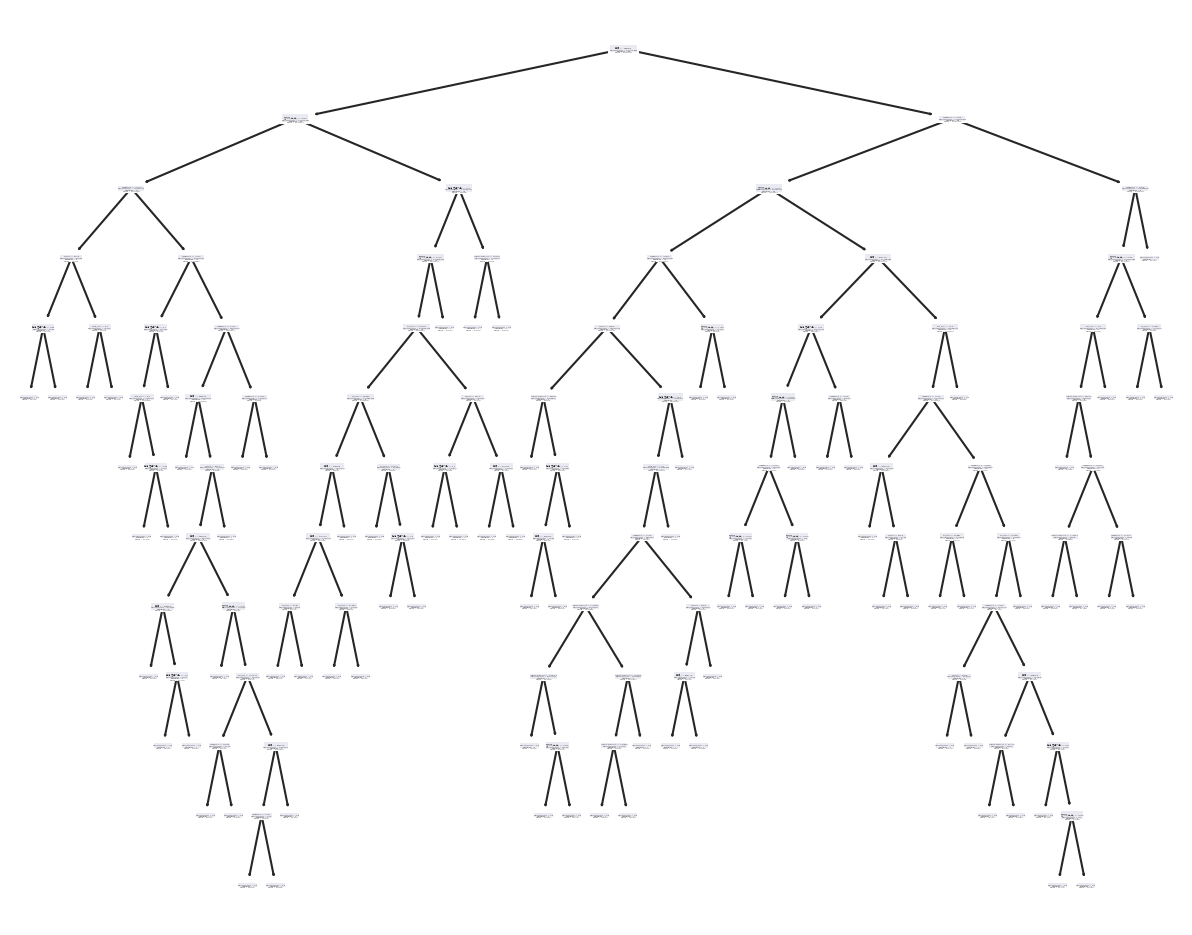

In [506]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8),dpi=150)
plot_tree(model, feature_names=x.columns)

### LSTM

In [507]:
df.columns

Index(['닭고기가격', '병아리(원/수)', '일별_평균기온', 'hot_day', 'cold_day', 'import amount',
       'feedprice', 'oil_avg', 'count', '도축'],
      dtype='object')

In [508]:
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['닭고기가격','병아리(원/수)','일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols


In [509]:
df_scaled.head()

,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,0.372686,0.197368,0.033784,0.0,0.666667,0.367022,0.887240,0.889336,0.134185,0.156334
1,0.605803,0.421053,0.047297,0.0,0.500000,0.473057,0.859792,0.946030,0.638978,0.114284
2,0.856428,0.526316,0.266892,0.0,0.000000,0.531282,0.844955,1.000000,0.955272,0.154607
3,0.471236,0.305263,0.503378,0.0,0.000000,0.734517,0.833086,0.958324,0.712460,0.185365
4,0.399200,0.131579,0.695946,0.0,0.000000,0.821854,0.832344,0.859478,0.357827,0.361840


In [510]:
TEST_SIZE = 200
WINDOW_SIZE = 20

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [514]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [519]:
from sklearn.model_selection import train_test_split

feature_cols = ['병아리(원/수)','일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축']
label_cols = ['닭고기가격']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size= .80)
x_train.shape, x_valid.shape

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.